In [22]:
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from pprint import pprint
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
from sklearn.dummy import DummyClassifier
import itertools
import warnings
from imblearn.over_sampling import SMOTE
warnings.simplefilter('ignore')
%run -i 'functions.py'

In [2]:
pd.set_option('display.max_columns', None)
df= pd.read_csv('final1.csv')
df.drop(['Unnamed: 0'],axis=1,inplace=True)
LAX = df[df['ORIGIN_STATE_ABR'] == 'CA']

In [3]:
LAX

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
0,1,1,24,4,2019-01-24,B6,1224,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,1637.0,-10.0,37.0,-24.0,0.0,279.0,2475.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
2,1,1,24,4,2019-01-24,B6,1424,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,2129.0,14.0,543.0,10.0,0.0,289.0,2475.0,NaN,NaN,NaN,NaN,NaN,True,False,False,2,False,False,False,False,False
7,1,1,24,4,2019-01-24,B6,2024,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,113.0,36.0,937.0,38.0,0.0,305.0,2475.0,36.0,0.0,2.0,0.0,0.0,True,False,False,2,True,False,True,False,False
9,1,1,25,5,2019-01-25,B6,24,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,533.0,-7.0,1338.0,-20.0,0.0,286.0,2475.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
11,1,1,25,5,2019-01-25,B6,124,12892,LAX,"Los Angeles, CA",CA,California,12478,JFK,"New York, NY",NY,New York,651.0,-9.0,1502.0,-15.0,0.0,292.0,2475.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35562,4,12,8,7,2019-12-08,UA,2304,12892,LAX,"Los Angeles, CA",CA,California,11618,EWR,"Newark, NJ",NJ,New Jersey,918.0,-7.0,1719.0,-25.0,0.0,267.0,2454.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
35564,4,12,8,7,2019-12-08,UA,2041,12892,LAX,"Los Angeles, CA",CA,California,11618,EWR,"Newark, NJ",NJ,New Jersey,612.0,-3.0,1406.0,-17.0,0.0,263.0,2454.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
35566,4,12,8,7,2019-12-08,UA,1960,12892,LAX,"Los Angeles, CA",CA,California,11618,EWR,"Newark, NJ",NJ,New Jersey,1611.0,-4.0,2346.0,-39.0,0.0,252.0,2454.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
35567,4,12,8,7,2019-12-08,UA,1882,12892,LAX,"Los Angeles, CA",CA,California,11618,EWR,"Newark, NJ",NJ,New Jersey,2119.0,4.0,446.0,-22.0,0.0,242.0,2454.0,NaN,NaN,NaN,NaN,NaN,True,False,False,2,False,False,False,False,False


In [4]:
airlines = {'OP_UNIQUE_CARRIER' : {'B6':1 ,'AA':2, 'AS':3, 'DL':4, 'UA':5 }}

In [5]:
airline=LAX.replace(airlines,inplace=True)

In [6]:
percentage(LAX)

percentage of ontime flights is 63.46693611766027
percentage of delay flights is 36.01100258223869
percentage of cancelled flights 0.5220613001010441


3    11306
2     6415
1       93
Name: class, dtype: int64


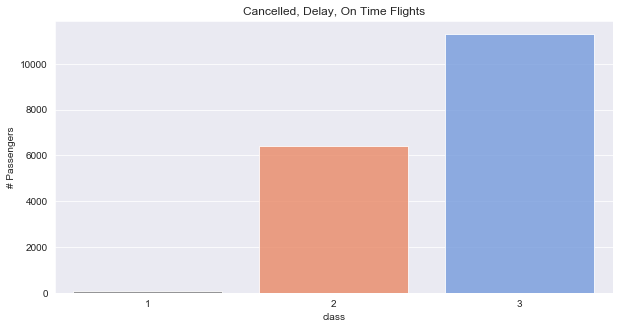

In [7]:
airportgraph(LAX)

We can see there is a class imbalance. Therefore we will need to SMOTE before we model.  

In [8]:
X = LAX[['QUARTER','MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK','OP_UNIQUE_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID','DEP_TIME','DEP_DELAY','ARR_TIME','ARR_DELAY','CANCELLED','AIR_TIME','DISTANCE']]
y= LAX['class']

[0.01323805 0.0275193  0.03451656 0.02668774 0.02054691 0.03114118
 0.         0.10520812 0.4665416  0.0602421  0.14810516 0.01122118
 0.04802098 0.00701112]


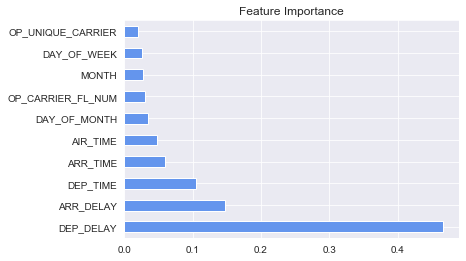

In [9]:
featureimport(X,y)

Calculating feature importance, it shows departure delay has an influence in classifying therefore we must not include departure delay.

# Baseline Model

In [10]:
X = LAX[['QUARTER','MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK','OP_UNIQUE_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID','DEP_TIME','ARR_TIME','ARR_DELAY','CANCELLED','AIR_TIME','DISTANCE']]
y= LAX['class']
X_r, y_r = SMOTE().fit_sample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_r, y_r, test_size=0.2, random_state=42)


Here we are SMOTing our X and Y values to improveour class imbalance.

We create the baseline model, we will use the results to see how model perform.

In [14]:
dummy_clf = DummyClassifier(strategy= 'most_frequent').fit(X_train,y_train)
dummy_pred = dummy_clf.predict(X_test)
dummy_clf.score(X_train, y_train)

0.3342301171961377

In [15]:
datatable(y_test,dummy_pred)

,Micro,Macro,Weighted
Precison,0.329746,0.109915,0.108733
Recall,0.329746,0.333333,0.329746
F1 Score,0.329746,0.165318,0.163539


In [254]:
cm = confusion_matrix(y_test,dummy_pred)
classes = ['On Time', 'Delay','Cancel']

Confusion Matrix, without normalization
[[2237    0    0]
 [2266    0    0]
 [2281    0    0]]


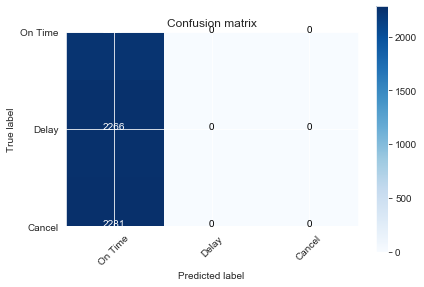

In [255]:
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

# Logistic Regression 

In [18]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.8438974056603774


In [19]:
y_test.value_counts()

3    2281
2    2266
1    2237
Name: class, dtype: int64

In [20]:
cm = confusion_matrix(y_test,y_pred)
classes = ['On Time', 'Delay','Cancel']

Confusion Matrix, without normalization
[[2237    0    0]
 [   0 1572  694]
 [   0  365 1916]]


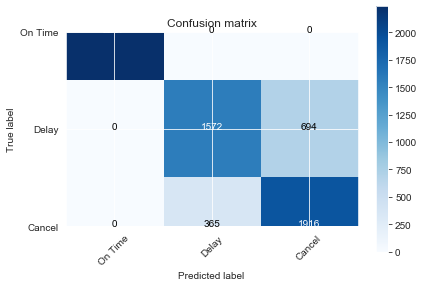

In [21]:
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [22]:
datatable(y_test,y_pred)

,Micro,Macro,Weighted
Precison,0.843897,0.848555,0.847654
Recall,0.843897,0.844572,0.843897
F1 Score,0.843897,0.843839,0.843038


The evaluation metrics we are looking at is F1 score. We want a balance between precison and recall. Since recall calculates true positives and precison takes into account how many are actually positive. I was to assure the flight is being classified correctly as ontime, delayed or if it get cancelled.

## Hyperparameter Tuning Logisitc Regression


In [141]:
clf = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],'C':[100,110,120,140,200,1000,5000],'max_iter':[120,130,140,150],'dual':[True,False]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values, verbose=0, cv=7)
grid_clf_acc.fit(X_train, y_train)

GridSearchCV(cv=7, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [100, 110, 120, 140, 200, 1000, 5000],
                         'dual': [True, False],
                         'max_iter': [120, 130, 140, 150],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [142]:
grid_clf_acc.best_params_

{'C': 100, 'dual': False, 'max_iter': 150, 'penalty': 'l2'}

In [143]:
refclf = LogisticRegression(C=100,penalty='l2',dual=False, max_iter=150)
refclf.fit(X_train,y_train)
refpred=refclf.predict(X_test)

In [252]:
cm = confusion_matrix(y_test,refpred)
classes = ['On Time', 'Delay','Cancel']

Confusion Matrix, without normalization
[[2237    0    0]
 [   0 1584  682]
 [   0  331 1950]]


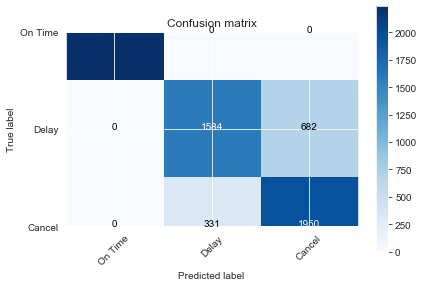

In [253]:
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [146]:
datatable(y_test,refpred)

,Micro,Macro,Weighted
Precison,0.850678,0.856012,0.855142
Recall,0.850678,0.851306,0.850678
F1 Score,0.850678,0.850509,0.849744


After tuning the model, we can see F1 Score increases a tad bit to .85 from .84! The model improved but not as much as we hoped. Lets try a different model, Random Forest.

# Random Forest

In [147]:

rfc2 = RandomForestClassifier(random_state=42)
rfc2.fit(X_train, y_train)
test_pred = rfc2.predict(X_test)
accuracy_score(y_test, test_pred)

0.9377948113207547

In [250]:
cm = confusion_matrix(y_test,test_pred)
classes =['On Time', 'Delay','Cancel']

Confusion Matrix, without normalization
[[2237    0    0]
 [   0 2034  232]
 [   0  190 2091]]


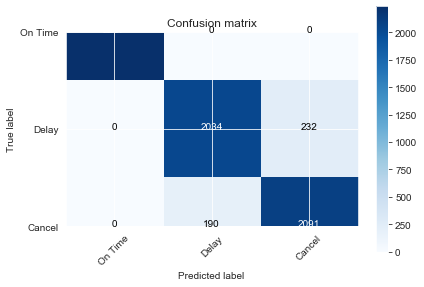

In [251]:
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [150]:
datatable(y_test,test_pred)

,Micro,Macro,Weighted
Precison,0.937795,0.938232,0.937884
Recall,0.937795,0.938107,0.937795
F1 Score,0.937795,0.938118,0.937788


The default model performed pretty well but I will tune it preform better. 

## Hyperparameter Tuning in Random Forest

In [234]:
param_grid = {
    'n_estimators': [100,150,250],
    'criterion':['gini', 'entropy'],
    'min_samples_leaf':[2,4,5],
    'min_samples_split':[3,5,7],
    'bootstrap': [True, False]
}

In [239]:
# Instantiate a GridSearch to tune model
gridsearch = GridSearchCV(estimator=rfc2, param_grid=param_grid, cv=10, n_jobs=-1)
gridsearch.fit(X_train, y_train)


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                 

In [240]:
gridsearch.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 250}

In [241]:
rfc_ref = RandomForestClassifier(criterion = 'entropy', min_samples_split=3, min_samples_leaf=2,n_estimators=250,
                                bootstrap= False,random_state=42, n_jobs=-1)
rfc_ref.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [242]:
refined_pred = rfc_ref.predict(X_test)


In [248]:
cm = confusion_matrix(y_test,refined_pred)
classes = ['On Time', 'Delay','Cancel']

Confusion Matrix, without normalization
[[2237    0    0]
 [   0 2030  236]
 [   0  167 2114]]


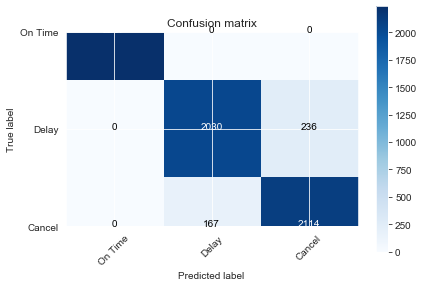

In [249]:
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [245]:
datatable(y_test,refined_pred)

,Micro,Macro,Weighted
Precison,0.940596,0.941187,0.940844
Recall,0.940596,0.940879,0.940596
F1 Score,0.940596,0.940893,0.940579


The tuned model does improve to .94 which is great! Random Forest performed better than Logistic Regression. Lets try a different model too see if it improves even more!

# KNN

In [16]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train)

y_predknn = model.predict(X_test)

In [17]:
y_test.value_counts()

3    2281
2    2266
1    2237
Name: class, dtype: int64

In [18]:
cm = confusion_matrix(y_test,y_predknn)
classes =['On Time', 'Delay','Cancel']

Confusion Matrix, without normalization
[[2237    0    0]
 [   2 1995  269]
 [   1  310 1970]]


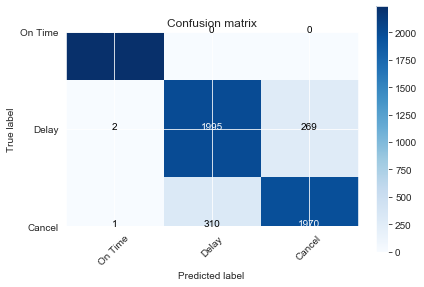

In [19]:
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [20]:
datatable(y_test,y_predknn)

,Micro,Macro,Weighted
Precison,0.91421,0.914676,0.914240
Recall,0.91421,0.914687,0.914210
F1 Score,0.91421,0.914635,0.914178


In [23]:
kscores()

[0.9367399124581414, 0.9196349312705768, 0.9247922333531424, 0.9167787041161195, 0.919637922982899, 0.9116981450786202, 0.9141781950710388, 0.9104009386334426, 0.9110850248409109, 0.9086493634969731, 0.9099060076146751]


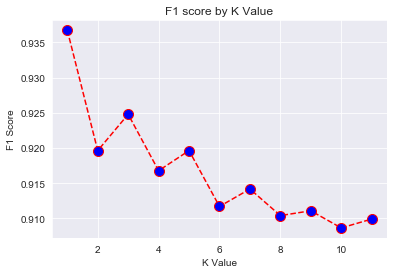

In [29]:
kvalvisual()

According to the visual it seem the Kvalue =1 returns the highest F1 score. I'll plug it in and evuluate it. 

## Hyperparameter Tunning KNN

In [30]:
model2 = KNeighborsClassifier(n_neighbors=1)
model2.fit(X_train, y_train)

y_predknnbest = model2.predict(X_test)

In [31]:
cm1 = confusion_matrix(y_test,y_predknnbest)
classes =['On Time', 'Delay','Cancel']

Confusion Matrix, without normalization
[[2237    0    0]
 [   1 2093  172]
 [   0  256 2025]]


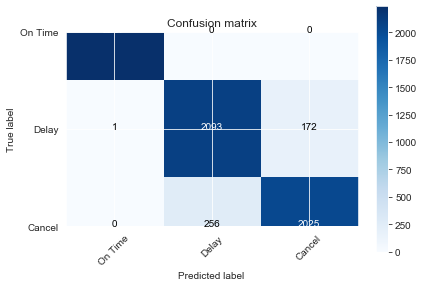

In [32]:
plot_confusion_matrix(cm1, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [33]:
datatable(y_test,y_predknnbest)

,Micro,Macro,Weighted
Precison,0.936763,0.937427,0.937127
Recall,0.936763,0.937141,0.936763
F1 Score,0.936763,0.937080,0.936740


Kvalue of 1 does return a high F1 score but it still seems that the tunes Randon forest model performed the best. I'll try one more model. 

# XGBoost

In [34]:
xgb = XGBClassifier(n_jobs = 3)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=3,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [35]:
prediction = xgb.predict(X_test)

In [36]:
y_train.value_counts()

1    9069
2    9040
3    9025
Name: class, dtype: int64

In [37]:
cm2 = confusion_matrix(y_test,prediction)
classes =['On Time', 'Delay','Cancel']

Confusion Matrix, without normalization
[[2237    0    0]
 [   0 1770  496]
 [   0  288 1993]]


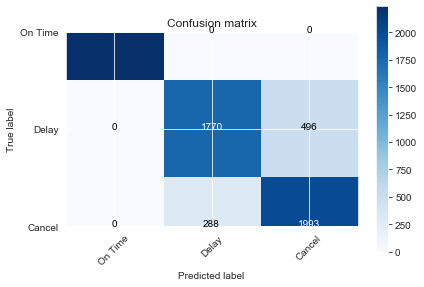

In [38]:
plot_confusion_matrix(cm2, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [39]:
datatable(y_test,prediction)

,Micro,Macro,Weighted
Precison,0.884434,0.886927,0.886253
Recall,0.884434,0.884951,0.884434
F1 Score,0.884434,0.884775,0.884174


It seems that XGBoost performed as well as Logistic Regression. I will stop here and use Random Forest as the best model.